In [2]:
import numpy as np
import matplotlib.pyplot as plt
nations = np.genfromtxt("nations.csv", delimiter=",", skip_header=True)

32.1312196364624


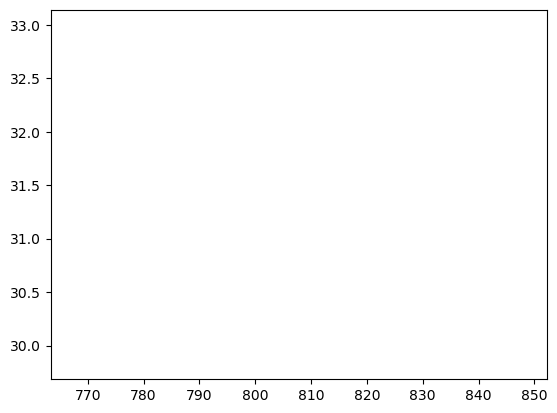

In [9]:
gdpC = np.array(np.multiply(np.divide(nations[:,3],nations[:,6]),1000000))
#plt.scatter(gdpC, nations[:,4])
#plt.xlim(0, 150000)

#line
startpoint = np.array([0, 70])
endpoint = np.array([137400,80.8])


line = np.array([startpoint,endpoint])
# plt.plot(line[:,0],line[:,1],'r-')
# plt.show()

## Linear Equation
def linearEqyualtion(x, sP, eP):
    dx = np.subtract(eP[0], sP[0])
    dy = np.subtract(eP[1], sP[1])
    m = np.divide(dy, dx)
    n = np.subtract(sP[1], np.multiply(m, sP[0]))

    return np.add(np.multiply(m, x), n)

def coeffients(number):
    cV = np.random.uniform(low=-1.0, high=1.0, size=number)

    multiply = 100

    for i in range(number):
        cV[i] = cV[i] * multiply
        multiply = multiply / 100000

    return cV



def polynomial(x, coeffients):
    y = 0
    for i in range(len(coeffients)):
        y = np.add(y, np.multiply(coeffients[i], np.power(x, i)))

    return y

## RMSE
rsmeN = 0
rmseL = 100000000
errorAdd = 0

polyLine = np.array([])
gdpCList = np.array([])


for i in range(100):
    cos = coeffients(3)
    gdpCListN = np.array([])
    polyLineN = np.array([])
    for n in nations:
        gdpC = np.multiply(np.divide(n[3], n[6]), 1000000)
        gdpCListN = np.append(gdpCList, gdpC)
        lifespan_expected = polynomial(gdpC, cos)
        lifespan = n[4]

        polyLineN = np.append(polyLine, lifespan_expected)

        error = np.subtract(lifespan_expected, lifespan)
        errorPow = np.power(error, 2)
        errorAdd += errorPow

    errorDiv = np.divide(errorAdd, len(nations))
    rsmeN = np.sqrt(errorDiv)

    if rsmeN < rmseL:
        rmseL = rsmeN
        bestCos = cos
        polyLine = polyLineN
        gdpCList = gdpCListN


print(rmseL)
plt.plot(gdpCList, polyLine, 'r-')
plt.show()
# Array with points of [gdp, life expectancy] did not work (count fire out how to append properly)